In [1]:

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pycaret
import warnings
import jinja2

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import *
from pycaret.regression import *

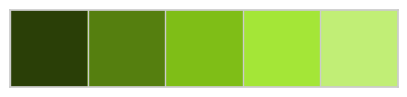

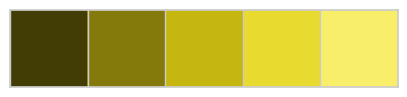

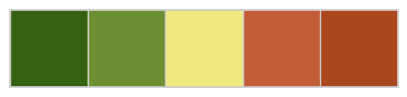

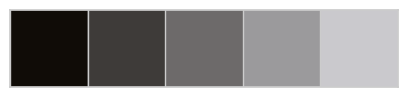

In [2]:
 #--- Create List of Color Palletes ---
olive_grad = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76']
yellow_grad = ['#413D05', '#837A0B', '#C5B710', '#E8DA2E', '#F9EE6A']
color_mix = ['#356211', '#6C8F32', '#F2E880', '#C15C37', '#AA471F']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(olive_grad)
sns.palplot(yellow_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [3]:
ds = pd.read_csv('C:/Users/pc/Downloads/avocado_data.csv')
ds.head().style.background_gradient(cmap='Greens').set_properties(**{'font-family': 'Segoe UI'}).hide(axis="index")


Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
1,2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2,2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
3,2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
4,2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany


In [4]:
# --- Change `Date` Format to 'datetime' ---
ds.Date = pd.to_datetime(ds.Date)

# --- Extracting Month Number from `Date`  ---
ds['month'] = pd.DatetimeIndex(ds['Date']).month

In [5]:
# --- Setup PyCaret Regression Module ---
from pycaret.regression import setup

avc = setup(
    data = ds,
    target = 'AveragePrice',
    train_size = 0.8,
    categorical_features = ['type', 'year', 'region'],
    normalize = True,
    normalize_method = 'robust',
    session_id = 123
)


,Description,Value
0,Session id,123
1,Target,AveragePrice
2,Target type,Regression
3,Original data shape,"(18249, 15)"
4,Transformed data shape,"(18249, 20)"
5,Transformed train set shape,"(14599, 20)"
6,Transformed test set shape,"(3650, 20)"
7,Numeric features,10
8,Date features,1
9,Categorical features,3


In [6]:
# --- List PyCaret Regression Models ---
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# --- Comparing All Models ---
best_models = compare_models(sort='R2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:36:39
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0717,0.0109,0.1045,0.9324,0.0421,0.0530,7.2110
rf,Random Forest Regressor,0.0799,0.0131,0.1143,0.9192,0.0460,0.0591,10.9310
dt,Decision Tree Regressor,0.1103,0.0279,0.1670,0.8275,0.0667,0.0804,0.5160
knn,K Neighbors Regressor,0.1496,0.0434,0.2083,0.7318,0.0834,0.1107,0.5020
ada,AdaBoost Regressor,0.1840,0.0529,0.2300,0.6730,0.0956,0.1459,2.5380
lr,Linear Regression,0.1902,0.0642,0.2532,0.6038,0.1022,0.1434,1.2070
ridge,Ridge Regression,0.1903,0.0642,0.2532,0.6037,0.1022,0.1435,0.2400
br,Bayesian Ridge,0.1903,0.0642,0.2532,0.6037,0.1022,0.1435,0.3120
huber,Huber Regressor,0.1943,0.0668,0.2583,0.5866,0.1045,0.1464,0.6950
en,Elastic Net,0.3194,0.1584,0.3980,0.0220,0.1636,0.2523,0.2720


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [ ]:
# --- Plot the Residual of Best Model (et) ---
plot_model(best_models)

In [ ]:
# --- Plot Error Prediction for Best Model ---
plot_model(best_models, plot = 'error')

In [ ]:
# --- Plot Feature Importance for Best Model ---
plot_model(best_models, plot='feature')


In [ ]:
# --- Tuning Best Model ---
tuned_best = tune_model(best_models)

In [ ]:
# --- Plot the Residual of Tuned Best Model ---
plot_model(tuned_best)

In [ ]:
# --- Plot Error Prediction for Tuned Best Model ---
plot_model(tuned_best, plot = 'error')

In [ ]:
# --- Plot Feature Importance for Tuned Best Model ---
plot_model(tuned_best, plot = 'feature')

In [ ]:
# --- Create RFR Model ---
rf = create_model('rf')

In [ ]:
# --- Plot the Residual of RFR Model ---
plot_model(rf)

In [ ]:
# --- Plot Error Prediction for RFR Model ---
plot_model(rf, plot = 'error')

In [ ]:
# --- Plot Feature Importance for RFR Model --
plot_model(rf, plot = 'feature')

In [ ]:
# --- Tuning RFR Model ---
tune_rf = tune_model(rf)

In [ ]:
# --- Plot the Residual of RFR Model ---
plot_model(tune_rf)

In [ ]:
# --- Plot Error Prediction for Tuned RFR Model ---
plot_model(tune_rf, plot = 'error')

In [ ]:
# --- Plot Feature Importance for Tuned RFR Model ---
plot_model(tune_rf, plot = 'feature')

In [ ]:
# --- Create Light GBM ---
lgbm = create_model('lightgbm')

In [ ]:
# --- Plot the Residual of Light GBM ---
plot_model(lgbm)

In [ ]:
# --- Plot Error Prediction for Light GBM ---
plot_model(lgbm, plot = 'error')

In [ ]:
# --- Plot Feature Importance for Light GBM --
plot_model(lgbm, plot = 'feature')

In [ ]:
# --- Tuning Light Gradient Boost ---
tune_lgbm = tune_model(lgbm)

In [ ]:
# --- Plot the Residual of Tuned Light Gradient Boost ---
plot_model(tune_lgbm)

In [ ]:
# --- Plot Error Prediction for Tuned Light Gradient Boost ---
plot_model(tune_lgbm, plot = 'error')

In [ ]:
# --- Plot Feature Importance for Tuned Light Gradient Boost --
plot_model(tune_lgbm, plot = 'feature')

In [ ]:
# --- Prediction using Best Model ---
predict_model(best_models)

In [ ]:
# --- Prediction using RFR Model ---
predict_model(rf)

In [ ]:
# --- Prediction using Light Gradient Boosting Model ---
predict_model(lgbm)

In [ ]:
# --- Finalize Best Model ---
final_best = finalize_model(best_models)

# --- Final Best Model Parameters for Deployment ---
plot_model(best_models, plot='parameter')

In [ ]:
# --- Prediction using Final Model ---
predict_model(final_best)

In [ ]:
# --- Save Final Model into Pickle File ---
save_model(final_best,'Final_Best_Model_caesarmario_06May2022')